In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

Data1 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Difraccion de electrones\Datos1.txt")
Data2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Difraccion de electrones\Datos2.txt")
Data3 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Difraccion de electrones\Datos1.txt")
Data1

,U,d1,d2,g2,g1
0,2.5,5.60,3.06,0.34,0.30
1,3.0,5.00,2.81,0.30,0.28
2,3.5,4.61,2.63,0.20,0.30
3,4.0,4.35,2.53,0.20,0.23
4,4.5,4.15,2.37,0.20,0.20
5,5.0,3.94,2.21,0.17,0.21


In [25]:
V = Data1['U']*1000
Vg = []
for i in range(len(V)):
    Vg.append(V[i]**(-1/2))

D1_1 = Data1['d1']*0.01
D2_1 = Data1['d2']*0.01
D1_2 = Data2['d1']*0.01
D2_2 = Data2['d2']*0.01
D1_3 = Data3['d1']*0.01
D2_3 = Data3['d2']*0.01

In [64]:
#Obtener medidas de incertidumbre

#El r^2 de excel
def GetR2(x,y):
    matrix = np.corrcoef(x,y)
    R2 = (matrix[0,1])**2
    return R2

#Residuales 
def Residuals(y,ym):
    e = []
    for i in range(len(y)):
        e.append(y[i]-ym[i])
    return e

#Regresión lineal
param1_1,cov1_1 = np.polyfit(Vg, D1_1, 1,cov=True)
_xc = np.linspace(0,max(Vg),len(Vg))
m1_1 = param1_1[0]
l1_1 = param1_1[1] 
ym1_1 = m1_1*_xc + l1_1

R2c = GetR2(Vg, D1_1)
resc = Residuals(D1_1,ym1_1)
error = np.sqrt(np.diag(cov1_1))

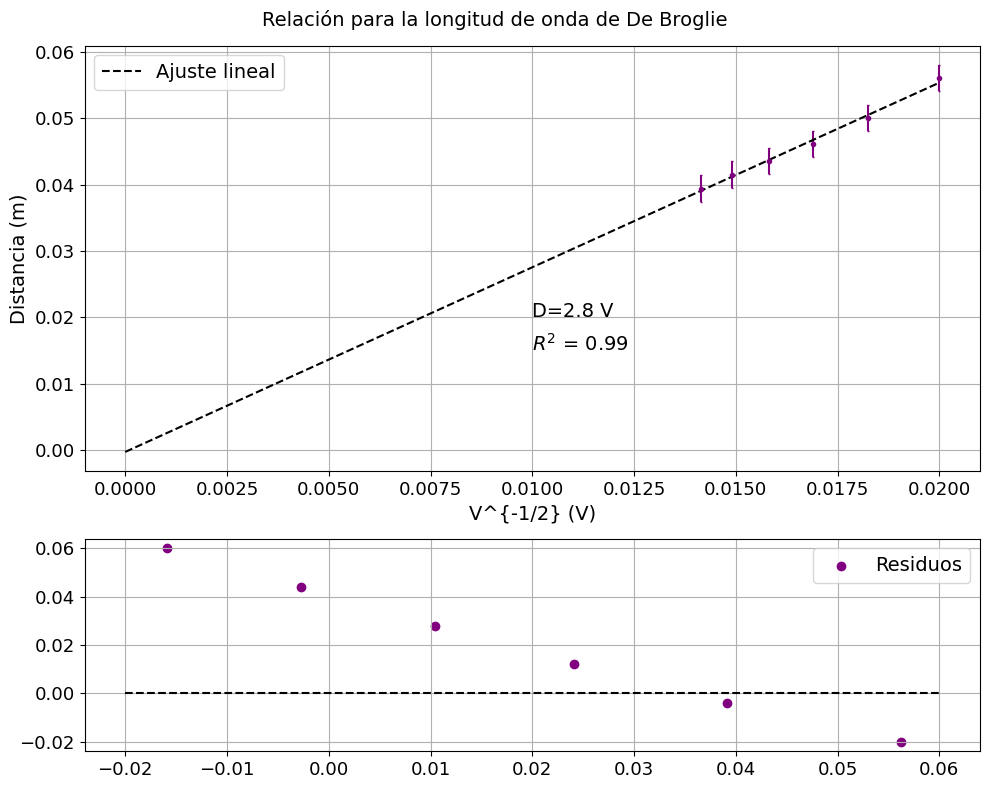

In [67]:
# #Gráfico con residuos
fig, axis = plt.subplots(2,1, figsize = (10, 8), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Relación para la longitud de onda de De Broglie',fontsize=14)

ax1.errorbar(Vg, D1_1,color='purple',fmt='.',capsize=0.5,yerr=error[1])
ax1.plot(_xc,ym1_1,'--',color='k', label=r'Ajuste lineal')
ax1.set_ylabel(r"Distancia (m)",fontsize=14)
ax1.set_xlabel(r'V^{-1/2} (V)',fontsize=14)
ax1.text(0.01, 0.02, r'D={} V'.format(round(m1_1,1)),color='k',fontsize=14)
ax1.text(0.01, 0.015, r'$R^2$ = {}'.format(round(R2c,2)),color='k',fontsize=14)
ax1.grid()
ax1.legend()
ax1.tick_params(axis='both',labelsize=13)
ax1.legend(fontsize=14)

xresc = np.linspace(-0.02,0.06,len(Vg))
ax2.scatter(resc,xresc,label = 'Residuos',color='purple')
ax2.plot(xresc,np.zeros_like(xresc),'--',color='k')
ax2.grid()
ax2.legend()
ax2.tick_params(axis='both',labelsize=13)
ax2.legend(fontsize=14)

fig.tight_layout()
#plt.savefig('Calibracion.pdf')

In [ ]:
#Calculo de onda de De Broglie
lambdaB 